<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Exercise:</span> Feature Engineering</h1>
<hr>
Welcome to the <span style="color:royalblue">Feature Engineering</span> Exercise! 

Remember, **better data beats better algorithms**.


<br><hr id="toc">

### In this module...

In this module, we'll cover the essential steps for building your analytical base table:
1. [Engineer features](#engineer-features)
2. [Save the ABT](#save-abt)

Finally, we'll save the ABT to a new file so we can use it in other modules.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

We've provided comments for guidance.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns

Next, let's import the dataset.
* The file path is <code style="color:crimson">'project_files/clean_employee_data.csv'</code>

In [2]:
# Load employee data from CSV
df = pd.read_csv('../project_files/clean_employee_data.csv')

In [3]:
df.head()

avg_monthly_hrs   department  filed_complaint  last_evaluation  n_projects  \
0              221  engineering              0.0         0.932868           4   
1              232      support              0.0         0.000000           3   
2              184        sales              0.0         0.788830           3   
3              206        sales              0.0         0.575688           4   
4              249        sales              0.0         0.845217           3   

   recently_promoted  salary  satisfaction    status  tenure  \
0                0.0     low      0.829896      Left     5.0   
1                0.0     low      0.834544  Employed     2.0   
2                0.0  medium      0.834988  Employed     3.0   
3                0.0     low      0.424764  Employed     2.0   
4                0.0     low      0.779043  Employed     3.0   

   last_evaluation_missing  
0                        0  
1                        1  
2                        0  
3                        0  
4                        0

<span id="engineer-features"></span>
# 1. Engineer features

For this project, we're going to have an abbreviated version of feature engineering, since we've already covered many tactics in the last lesson.

<br>
Do you remember the scatterplot of <code style="color:steelblue">'satisfaction'</code> and <code style="color:steelblue">'last_evaluation'</code> for employees who have <code style="color:crimson">'Left'</code>?

**Let's reproduce it here, just so we have it in front of us.**

In [6]:
# Create boolean series: `has_left` ... has this employee left?
has_left = df['status'] == 'Left'

# index df by `has_left` to create `left_df`
left_df = df[has_left]
left_df = left_df.reset_index(drop=True)

avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                 221  engineering              0.0         0.932868   
1                 147        sales              0.0         0.000000   
2                 290  engineering              0.0         0.770248   
3                 258      support              0.0         0.837503   
4                 252           IT              0.0         0.919196   
5                 154    marketing              0.0         0.000000   
6                 132    marketing              0.0         0.495013   
7                 308  engineering              0.0         0.863263   
8                 147  engineering              0.0         0.000000   
9                 274      support              0.0         0.842357   
10                278        sales              0.0         0.766256   
11                135        sales              0.0         0.533362   
12                245  engineering              0.0         0.932527   
13                132   management              0.0         0.535232   
14                258      product              0.0         0.813774   
15                146        sales              0.0         0.531577   
16                198  engineering              0.0         0.749982   
17                159    marketing              0.0         0.483107   
18                143      support              0.0         0.583223   
19                158      support              0.0         0.543576   
20                146  engineering              0.0         0.557437   
21                219      support              0.0         1.000000   
22                271           IT              0.0         0.969304   
23                310        sales              0.0         0.858179   
24                278        sales              0.0         0.862237   
25                135  engineering              0.0         0.451192   
26                248      support              0.0         1.000000   
27                150            0              0.0         0.559400   
28                146           IT              0.0         0.500957   
29                148        sales              0.0         0.473027   
...               ...          ...              ...              ...   
3337              156        sales              0.0         0.545183   
3338              267   management              0.0         0.864262   
3339              292  engineering              0.0         0.826664   
3340              275      support              0.0         1.000000   
3341              192      finance              0.0         0.985526   
3342              303        sales              0.0         0.973260   
3343              305        sales              0.0         0.891870   
3344              259      product              0.0         0.947355   
3345              235            0              0.0         1.000000   
3346              159    marketing              0.0         0.507284   
3347              155            0              0.0         0.457821   
3348              156            0              0.0         0.405662   
3349              263            0              0.0         0.937390   
3350              310            0              0.0         0.793898   
3351              257  engineering              0.0         1.000000   
3352              159        sales              0.0         0.000000   
3353              279        sales              0.0         0.851062   
3354              244      support              1.0         0.881154   
3355              126  engineering              0.0         0.519671   
3356              152      product              0.0         0.471779   
3357              142      support              0.0         0.000000   
3358              252    marketing              0.0         0.898083   
3359              142      product              0.0         0.533894   
3360              259           IT            

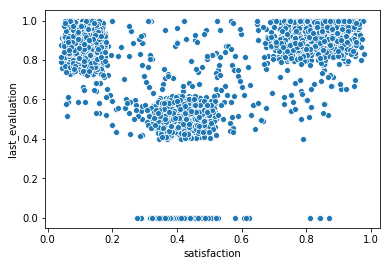

In [7]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.scatterplot("satisfaction", "last_evaluation", data=left_df)
plt.show()

These roughly translate to 3 **indicator features** we can engineer:

* <code style="color:steelblue">'underperformer'</code> - last_evaluation < 0.6 and last_evaluation_missing == 0
* <code style="color:steelblue">'unhappy'</code> - satisfaction_level < 0.2
* <code style="color:steelblue">'overachiever'</code> - last_evaluation > 0.8 and satisfaction > 0.7

<br>

**Create those 3 indicator features.**
* Use boolean masks.
* **Important:** For <code style="color:steelblue">'underperformer'</code>, it's important to include <code style="color:steelblue">'last_evaluation_missing' == 0</code> to avoid those originally missing observations that we flagged and filled.

#### Create indicator features

Remember, we are making indicator variables by running boolean commands a single column or combhination of multiple columns.

1. **This check will result in a boolean series like: `[True, False, True, False, False, ...]`,**


2. **We then use `.astype(int)` on that boolean series to convert it to an indicator variable which looks like: `[1,0,1,0,0, ...]`**

In [13]:
# df['underperformer']
# Wrong - df['underperformer'] = df[((df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0))]
# Wrong - df.loc[(df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0), "underperformer"] = 1

df['underperformer'] = ((df['last_evaluation'] < 0.6) & (df['last_evaluation_missing'] == 0)).astype(int)

# df['unhappy']
df['unhappy'] = (df['satisfaction'] < 0.2).astype(int)

# df['overachiever']
df['overachiever'] = ((df['last_evaluation'] > 0.8)&(df['satisfaction'] > 0.7)).astype(int)

<br>

**Next, run code to check that you created the features correctly.**

In [16]:
# The proportion of observations belonging to each group
df['underperformer'].mean()

0.2852573215808928

In [15]:
df['unhappy'].mean()

0.09219505260164913

In [17]:
df['overachiever'].mean()

0.1770685243104919

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="save-abt"></span>
# 2. Save the ABT

Finally, let's save the **analytical base table**. 

<br>

**Convert <code style="color:steelblue">'status'</code> into an indicator variable.**
* <code style="color:crimson">'Left'</code> should be <code style="color:crimson">1</code>
* <code style="color:crimson">'Employed'</code> should be <code style="color:crimson">0</code>
* There's also a really easy way you can use <code style="color:steelblue">pd.get_dummies()</code> here.

In [18]:
 # Convert status to an indicator variable
df['left'] = (df['status'] == "Left").astype(int)

**To confirm we did that correctly, display the proportion of people in our dataset who left.**

In [ ]:
df.head()

In [20]:
# The proportion of observations who 'Left'
# if we have a series of 1s and 0s, what would the mean represent?
df['left'].mean()

0.23933750355416547

**Overwrite your dataframe with a version that has <span style="color:royalblue">dummy variables</span> for the categorical features.**
* Then, display the first 10 rows to confirm all of the changes we've made so far in this module.

#### Format for `pd.get_dummies()`
`pd.get_dummies(data = your_df, columns = ['all', 'categorical', 'columns', 'in', 'df'])`

In [24]:
# Create new dataframe with dummy features
cats = df.dtypes[df.dtypes=='object'].index
df = pd.get_dummies(df, cats)

In [25]:
# Display first 10 rows
df.head(10)

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0              221              0.0         0.932868           4   
1              232              0.0         0.000000           3   
2              184              0.0         0.788830           3   
3              206              0.0         0.575688           4   
4              249              0.0         0.845217           3   
5              140              0.0         0.589097           4   
6              121              1.0         0.625399           3   
7              150              0.0         0.644586           4   
8              215              1.0         0.524114           3   
9              269              0.0         0.909364           5   

   recently_promoted  satisfaction  tenure  last_evaluation_missing  \
0                0.0      0.829896     5.0                        0   
1                0.0      0.834544     2.0                        1   
2                0.0      0.834988     3.0                        0   
3                0.0      0.424764     2.0                        0   
4                0.0      0.779043     3.0                        0   
5                0.0      0.660020     4.0                        0   
6                0.0      0.835571     3.0                        0   
7                0.0      0.796683     3.0                        0   
8                0.0      0.715005     7.0                        0   
9                0.0      0.994037     2.0                        0   

   underperformer  unhappy  overachiever  left  department_0  department_IT  \
0               0        0             1     1             0              0   
1               0        0             0     0             0              0   
2               0        0             0     0             0              0   
3               1        0             0     0             0              0   
4               0        0             1     0             0              0   
5               1        0             0     0             0              0   
6               0        0             0     0             0              0   
7               0        0             0     0             0              0   
8               1        0             0     0             0              0   
9               0        0             1     0             0              0   

   department_admin  department_engineering  department_finance  \
0                 0                       1                   0   
1                 0                       0                   0   
2                 0                       0                   0   
3                 0                       0                   0   
4                 0                       0                   0   
5                 0                       0                   0   
6                 0                       0                   0   
7                 0                       1                   0   
8                 0                       1                   0   
9                 0                       0                   0   

   department_management  department_marketing  department_procurement  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   department_product  department_sales  departme

In [27]:
target = df['left']

**Save this dataframe as your <span style="color:royalblue">employee analytical base table</span> to use in later lessons.**
* Remember to set the argument <code style="color:steelblue">index=None</code> to save only the data.

In [29]:
# Save analytical base table
df.to_csv("../project_files/employee_anaytical_base.csv", index=None)
target.to_csv("../project_files/employee_target.csv", index=None)

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>

## Next Steps

Congratulations for making through The Feature Engineering Module!

As a reminder, here are a few things you did:
* You engineered features by leveraging your exploratory analysis.
* And you created dummy variables before saving the ABT.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>